## Face & Eye Detection using HAAR Cascade Classifiers

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

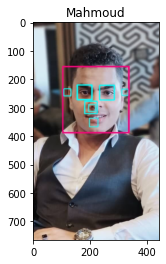

In [10]:
# Load our image then convert it to grayscale
image = cv2.imread('Mahmoud.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Mahmoud')
cv2.imwrite('Mahmoud1.jpg', image)

plt.show()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\dell\AppData\Local\Temp\ipykernel_5020\1575016518.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


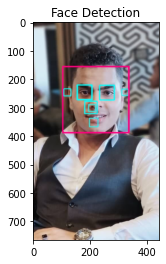

In [11]:
# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_frontalface_default.xml')

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    cv2.imwrite('face_detection.jpg', image); plt.show()

### Let's combine face and eye detection

In [12]:
eye_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_eye.xml')
face_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_frontalface_default.xml')

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\dell\AppData\Local\Temp\ipykernel_5020\2488286456.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


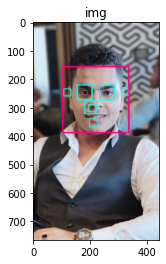

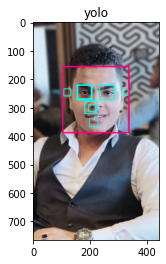

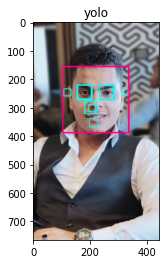

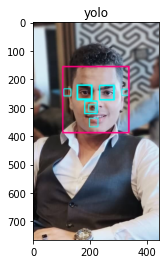

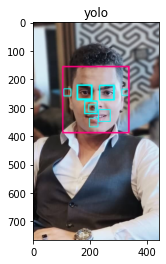

In [13]:
img = cv2.imread('Mahmoud.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('img'); plt.show()
    cv2.imwrite('img.jpg', image)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('yolo'); plt.show()
        cv2.imwrite('Mahmoud.jpg', img)

### Let's make a live face & eye detection, keeping the face inview at all times

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\dell\AppData\Local\Temp\ipykernel_5020\164617371.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


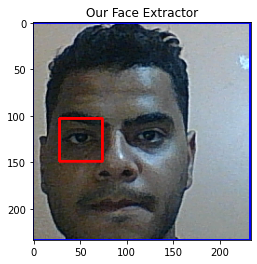

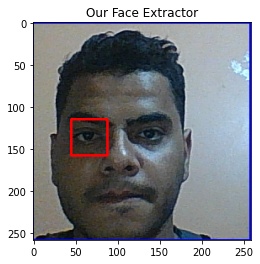

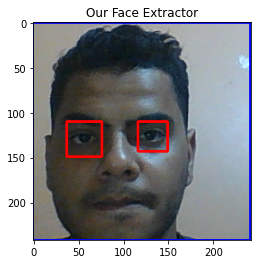

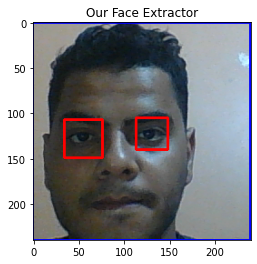

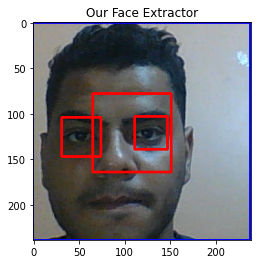

In [29]:
face_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)
v = 0
while True:
    if v == 5:
        break
    ret, frame = cap.read()
    
    plt.imshow(cv2.cvtColor(face_detector(frame), cv2.COLOR_BGR2RGB))
    plt.title('Our Face Extractor'); plt.show()
    cv2.imwrite('my_face.jpg', face_detector(frame))

    #cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
    v += 1
cap.release()
cv2.destroyAllWindows()      

In [30]:
cap.release()
cv2.destroyAllWindows()   

-------------------